# Simple Linear Regression

Linear regression is a prediction method that is more than 200 years old. Simple linear regression is a great first machine learning algorithm to implement as it requires you to estimate properties from your training dataset.

Linear regression assumes a linear or straight line relationship between the input variables (X) and the single output variable (y). More specifically, that output (y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.In simple linear regression we can use statistics on the training data to estimate the coefficients required by the model to make predictions on new data.

The line for a simple linear regression model can be written as:
    
    y = b0 + b1 * x

where b0 and b1 are the coefficients we must estimate from the training data.

Once the coefficients are known, we can use this equation to estimate output values for y given new input examples of x.

#### Bias

Bias is how far are the predicted values from the actual values. If the average predicted values are far off from the actual values then the bias is high.
High bias causes algorithm to miss relevant relationship between input and output variable. When a model has a high bias then it implies that the model is too simple and does not capture the complexity of data thus underfitting the data.


#### Covariance

In probability, covariance is the measure of the joint probability for two random variables. It describes how the two variables change together.

It is denoted as the function cov(X, Y), where X and Y are the two random variables being considered.

cov(X, Y) = E[(X - E[X] . (Y - E[Y])]



#### Correlation

The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

Correlation coefficent beteen to variables (say x and y) is given by:-

Rxy = cov(x,y) / std(x).std(y)



In [1]:
##### Dummy Example

In [2]:
x = [1,2,3,4,5]
y = [1,3,5,7,9]

The attribute x is the input variable and y is the output variable that we are trying to
predict. If we got more data, we would only have x values and we would be interested in
predicting y values. Below is a simple scatter plot of x versus y.


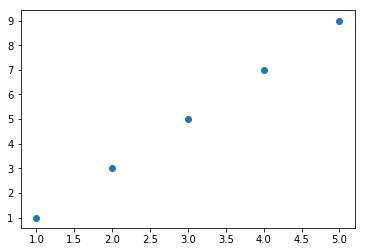

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

We can see the relationship between x and y looks kind-of linear. As in, we could probably
draw a line somewhere diagonally from the bottom left of the plot to the top right to generally
describe the relationship between the data. This is a good indication that using linear regression
might be appropriate for this little dataset.

When we have a single input attribute (x) and we want to use linear regression, this is called
simple linear regression. If we had multiple input attributes (e.g. X1, X2, X3, etc.) This would be called multiple linear regression. The procedure for linear regression is different and simpler
than that for multiple linear regression.


With simple linear regression we want to model our data as follows:
 y = B0 + B1 × x

This is a line where y is the output variable we want to predict, x is the input variable
we know and B0 and B1 are coefficients that we need to estimate that move the line around.
Technically, B0 is called the intercept because it determines where the line intercepts the y-axis.
In machine learning we can call this the bias, because it is added to offset all predictions that
we make. The B1 term is called the slope because it defines the slope of the line or how x
translates into a y value before we add our bias.

The goal is to find the best estimates for the coefficients to minimize the errors in predicting
y from x. Simple regression is great, because rather than having to search for values by trial
and error or calculate them analytically using more advanced linear algebra, we can estimate
them directly from our data. We can start off by estimating the value for B1 as

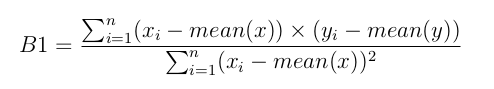

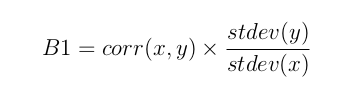

Where mean() is the average value for the variable in our dataset. The x i and y i refer to
the fact that we need to repeat these calculations across all values in our dataset and i refers to
the i’th value of x or y. We can calculate B0 using B1 and some statistics from our dataset, as
follows:

                                B0 = mean(y) − B1 × mean(x)

Calculate the B0 and B1 , then predict the yi using the given equation.

We can calculate an error score for our predictions called the Root Mean Squared Error or
RMSE.

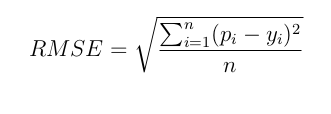

####  Problem Statement 

Predict the total payment for all the claims in thousands of Swedish Kronor (y) given the total number of claims (x).

#### Solution

In [4]:
### Simple Linear Regression from Scratch

In [12]:
# Simple Linear Regression on the Swedish Insurance Dataset

#Imports

from random import seed
from random import randrange
from csv import reader
from math import sqrt

In [13]:
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

In [14]:
# Simple linear regression on insurance dataset
seed(1)
# load and prepare data
filename = 'insurance.csv'
dataset = load_csv(filename)
dataset = dataset[1:]
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
    
print(dataset)

[[108.0, 392.5], [19.0, 46.2], [13.0, 15.7], [124.0, 422.2], [40.0, 119.4], [57.0, 170.9], [23.0, 56.9], [14.0, 77.5], [45.0, 214.0], [10.0, 65.3], [5.0, 20.9], [48.0, 248.1], [11.0, 23.5], [23.0, 39.6], [7.0, 48.8], [2.0, 6.6], [24.0, 134.9], [6.0, 50.9], [3.0, 4.4], [23.0, 113.0], [6.0, 14.8], [9.0, 48.7], [9.0, 52.1], [3.0, 13.2], [29.0, 103.9], [7.0, 77.5], [4.0, 11.8], [20.0, 98.1], [7.0, 27.9], [4.0, 38.1], [0.0, 0.0], [25.0, 69.2], [6.0, 14.6], [5.0, 40.3], [22.0, 161.5], [11.0, 57.2], [61.0, 217.6], [12.0, 58.1], [4.0, 12.6], [16.0, 59.6], [13.0, 89.9], [60.0, 202.4], [41.0, 181.3], [37.0, 152.8], [55.0, 162.8], [41.0, 73.4], [11.0, 21.3], [27.0, 92.6], [8.0, 76.1], [3.0, 39.9], [17.0, 142.1], [13.0, 93.0], [13.0, 31.9], [15.0, 32.1], [8.0, 55.6], [29.0, 133.3], [30.0, 194.5], [24.0, 137.9], [9.0, 87.4], [31.0, 209.8], [14.0, 95.5], [53.0, 244.6], [26.0, 187.5]]


The first step is to estimate the mean and the variance of both the input and output variables from the training data.

In [15]:
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

In [16]:
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

Covariance is a generalization of correlation. Correlation describes the relationship between two groups of numbers, whereas covariance can describe the relationship between two or more groups of numbers.

Additionally, covariance can be normalized to produce a correlation value.

In [17]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

We must estimate the values for two coefficients in simple linear regression

In [18]:
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

In [19]:
x = [row[0] for row in dataset]
x

[108.0,
 19.0,
 13.0,
 124.0,
 40.0,
 57.0,
 23.0,
 14.0,
 45.0,
 10.0,
 5.0,
 48.0,
 11.0,
 23.0,
 7.0,
 2.0,
 24.0,
 6.0,
 3.0,
 23.0,
 6.0,
 9.0,
 9.0,
 3.0,
 29.0,
 7.0,
 4.0,
 20.0,
 7.0,
 4.0,
 0.0,
 25.0,
 6.0,
 5.0,
 22.0,
 11.0,
 61.0,
 12.0,
 4.0,
 16.0,
 13.0,
 60.0,
 41.0,
 37.0,
 55.0,
 41.0,
 11.0,
 27.0,
 8.0,
 3.0,
 17.0,
 13.0,
 13.0,
 15.0,
 8.0,
 29.0,
 30.0,
 24.0,
 9.0,
 31.0,
 14.0,
 53.0,
 26.0]

The simple linear regression model is a line defined by coefficients estimated from training data.

Once the coefficients are estimated, we can use them to make predictions.

In [20]:
# Split a dataset into a train and test set
def train_test_split(dataset, split):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

In [22]:
# train = list()
# # print(len(dataset))
# train_size = split * len(dataset)
# # print(train_size)
# dataset_copy = list(dataset)
# # print(dataset_copy)
# while len(train) < train_size:
#     index = randrange(len(dataset_copy))
#     train.append(dataset_copy.pop(index))


In [23]:
#algorithm
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions

In [24]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)
 
# Evaluate an algorithm using a train/test split
def evaluate_algorithm(dataset, algorithm, split, *args):
    train, test = train_test_split(dataset, split)
    test_set = list()
    for row in test:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(train, test_set, *args)
    actual = [row[-1] for row in test]
    rmse = rmse_metric(actual, predicted)
    return rmse,actual,predicted

In [26]:
# train, test = train_test_split(dataset, 0.8)
# test_set = list()
# for row in test:
#     row_copy = list(row)
#     row_copy[-1] = None
#     test_set.append(row_copy)
# print(test_set)

In [27]:
# Simple linear regression on insurance dataset
seed(1)
# load and prepare data
filename = 'insurance.csv'
dataset = load_csv(filename)
dataset = dataset[1:]
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
# print(dataset)
# evaluate algorithm
split = 0.8
rmse,actual,prediction = evaluate_algorithm(dataset, simple_linear_regression, split)
print('RMSE: %.3f' % (rmse))


RMSE: 33.619


In [28]:
import pandas as pd
df_check = pd.DataFrame({'Actual': actual, 'Predicted': prediction})
df_check

,Actual,Predicted
0,248.1,183.063664
1,39.6,100.421217
2,48.8,47.530051
3,50.9,44.224353
4,14.8,44.224353
5,48.7,54.141447
6,38.1,37.612958
7,0.0,24.390166
8,12.6,37.612958
9,21.3,60.752843


In [ ]:
### Simple Linear Regression using Sklearn

In [29]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [30]:
df = pd.read_csv('insurance.csv')

In [31]:
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [41]:
X = df['X'].values.reshape(-1,1)
y = df['Y'].values.reshape(-1,1)
X.shape

(63, 1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [43]:
# y_train

In [44]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[19.28510308]
[[3.34637674]]


In [46]:
y_pred = regressor.predict(X_test)

In [47]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 42.58525130471344


In [48]:
df_check = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_check

,Actual,Predicted
0,152.8,143.101043
1,39.9,29.324233
2,187.5,106.290898
3,93.0,62.788001
4,14.6,39.363364
5,161.5,92.905391
6,38.1,32.670610
7,21.3,56.095247
8,248.1,179.911187
9,15.7,62.788001
